In [1]:
# Create empty raw_definitions, to hold definiendum, short definiendum (abbreviation of definiens), and definiens.
raw_definitions = []

In [2]:
# Needed if importing the terminology from a CSV file.
import csv

In [3]:
# Fill raw_definitions as a list of triples, where a triple includes the definiendum, short definiendum, and definiens.
with open('ilang_UN_GWHT_terminology_raw - Sheet1.csv') as raw_definitions_file:
    raw_definitions_csv = csv.reader(raw_definitions_file, delimiter = ',')
    for row in raw_definitions_csv:
        raw_definitions.append({'definiendum':row[0], 'short definiendum':row[1], 'definiens':row[2]})

In [4]:
# Show raw_definitions content and size.

In [5]:
print(raw_definitions)
len(raw_definitions)

[{'definiendum': 'Definiendum', 'short definiendum': 'Short Definiendum', 'definiens': 'Definiens'}, {'definiendum': 'Action Plan for the Future', 'short definiendum': 'Action Plan', 'definiens': 'The Action Plan for the Future (Cultural Landscapes)\n        was prepared by the UNESCO "Expert Meeting on\n        Cultural Landscapes of Outstanding Universal Value" held in\n        Templin, Germany in October 1993 (see von Droste et al\n        1995: Annex 1).  The Action Plan outlines\n        recommendations concerning the provision of "Guidance to\n        States Parties on the Identification, Assessment, Nomination\n        and Management of Cultural Landscapes for Inclusion in the\n        World Heritage List" and on the preparation of a "Thematic\n        Study on Cultural Landscapes".  The Action Plan was\n        adopted by the World Heritage Committee at its\n        seventeenth session in 1993 (UNESCO 4 February 1994:\n        55-56 and Annex VII).\n\nsee Cultural landscapes'},

160

In [6]:
# Define a function needed to ignore case, when searching for occurrences of definiendum and short definiendum in definiens.

In [7]:
import unicodedata
def normalize_caseless(text):
    return unicodedata.normalize("NFKD", text.casefold())

In [8]:
# Create an empry term dependencies network, to hold dependencies of definitions on terms.

In [9]:
term_dependency_network = []

In [10]:
# Make the term dependency network as follows, and fill it into term_dependency_network:
# If a definiendum or short definendum A appears in a definiens of B, then definiendum B depends on definiendum A.
for i in raw_definitions:
    for j in raw_definitions:
        if (normalize_caseless(i['definiendum']) in normalize_caseless(j['definiens'])) or (normalize_caseless(i['short definiendum']) in normalize_caseless(j['definiens'])):
            term_dependency_network.append({'definiendum':j['definiendum'], 'depends on':i['definiendum']})
            print(j['definiendum'], '--depends on->', i['definiendum'])

# Show term_dependency_network size.
len(term_dependency_network)

Action Plan for the Future --depends on-> Action Plan for the Future
Corrective measures --depends on-> Action Plan for the Future
Advisory bodies --depends on-> Advisory bodies
Reactive monitoring --depends on-> Advisory bodies
State of conservation --depends on-> Advisory bodies
Assistance --depends on-> Assistance
Balance --depends on-> Assistance
Convention concerning the protection of the world cultural and natural heritage --depends on-> Assistance
Emergency assistance --depends on-> Assistance
International assistance --depends on-> Assistance
International protection --depends on-> Assistance
List of World Heritage in Danger --depends on-> Assistance
Operational Guidelines for the Implementation of the World Heritage Convention --depends on-> Assistance
Preparatory assistance --depends on-> Assistance
Promotional activities --depends on-> Assistance
Technical co-operation --depends on-> Assistance
Training --depends on-> Assistance
World Heritage Committee --depends on-> Assist

Movable property --depends on-> Immovable property
Indicative list --depends on-> Indicative list
Inventory of property --depends on-> Indicative list
Authenticity --depends on-> Information sources
Information sources --depends on-> Information sources
Groups of urban buildings --depends on-> Inhabited historic towns
Inhabited historic towns --depends on-> Inhabited historic towns
Cultural heritage --depends on-> Inscription
Deferred --depends on-> Inscription
International Council of Monuments and Sites --depends on-> Inscription
Inscription --depends on-> Inscription
Tentative list --depends on-> Inscription
Corrective measures --depends on-> Integrity
Criteria --depends on-> Integrity
Cultural heritage criteria --depends on-> Integrity
Evaluation --depends on-> Integrity
Integrity --depends on-> Integrity
IUCN - The World Conservation Union --depends on-> Integrity
Management plan --depends on-> Integrity
Natural heritage criteria --depends on-> Integrity
Natural property --depends

Convention concerning the protection of the world cultural and natural heritage --depends on-> Outstanding universal value
Cultural heritage --depends on-> Outstanding universal value
Cultural landscapes --depends on-> Outstanding universal value
Global Strategy --depends on-> Outstanding universal value
Mixed property --depends on-> Outstanding universal value
Natural heritage --depends on-> Outstanding universal value
Outstanding universal value --depends on-> Outstanding universal value
Spirit of the Convention --depends on-> Outstanding universal value
Tentative list --depends on-> Outstanding universal value
Thematic studies --depends on-> Outstanding universal value
World Heritage --depends on-> Outstanding universal value
World Heritage Committee --depends on-> Outstanding universal value
World Heritage List --depends on-> Outstanding universal value
World Heritage value --depends on-> Outstanding universal value
Organization of World Heritage Cities --depends on-> OWHC
Precisel

State of conservation --depends on-> World Heritage Committee
United Nations Educational, Scientific and Cultural Organization --depends on-> World Heritage Committee
World Heritage Bureau --depends on-> World Heritage Committee
World Heritage Committee --depends on-> World Heritage Committee
Advisory bodies --depends on-> World Heritage Convention
Authenticity --depends on-> World Heritage Convention
Conservation --depends on-> World Heritage Convention
Identification --depends on-> World Heritage Convention
Integrity --depends on-> World Heritage Convention
Operational Guidelines for the Implementation of the World Heritage Convention --depends on-> World Heritage Convention
Presentation --depends on-> World Heritage Convention
Preservation --depends on-> World Heritage Convention
Property --depends on-> World Heritage Convention
Protection --depends on-> World Heritage Convention
Rehabilitation --depends on-> World Heritage Convention
Training --depends on-> World Heritage Conventio

1424

In [11]:
print(term_dependency_network)

[{'definiendum': 'Action Plan for the Future', 'depends on': 'Action Plan for the Future'}, {'definiendum': 'Corrective measures', 'depends on': 'Action Plan for the Future'}, {'definiendum': 'Advisory bodies', 'depends on': 'Advisory bodies'}, {'definiendum': 'Reactive monitoring', 'depends on': 'Advisory bodies'}, {'definiendum': 'State of conservation', 'depends on': 'Advisory bodies'}, {'definiendum': 'Assistance', 'depends on': 'Assistance'}, {'definiendum': 'Balance', 'depends on': 'Assistance'}, {'definiendum': 'Convention concerning the protection of the world cultural and natural heritage', 'depends on': 'Assistance'}, {'definiendum': 'Emergency assistance', 'depends on': 'Assistance'}, {'definiendum': 'International assistance', 'depends on': 'Assistance'}, {'definiendum': 'International protection', 'depends on': 'Assistance'}, {'definiendum': 'List of World Heritage in Danger', 'depends on': 'Assistance'}, {'definiendum': 'Operational Guidelines for the Implementation of th

In [14]:
# Create an empty networkx graph to hold the term dependency network
import networkx as nx
tdn_graph = nx.DiGraph()

In [15]:
# Add to tdn_graph a directed edge for each term dependency in term_dependency_network.
for i in term_dependency_network:
    tdn_graph.add_edge(i['definiendum'], i['depends on'], label = 'depends')

In [16]:
# Show edges and nodes of tdn_graph.
print(tdn_graph.edges)
print(tdn_graph.nodes)

[('Action Plan for the Future', 'Action Plan for the Future'), ('Action Plan for the Future', 'Committee'), ('Action Plan for the Future', 'Cultural landscapes'), ('Action Plan for the Future', 'Identification'), ('Action Plan for the Future', 'List'), ('Action Plan for the Future', 'Management'), ('Action Plan for the Future', 'Nomination'), ('Action Plan for the Future', 'Outstanding universal value'), ('Action Plan for the Future', 'States Parties'), ('Action Plan for the Future', 'UNESCO'), ('Action Plan for the Future', 'World Heritage'), ('Action Plan for the Future', 'World Heritage Committee'), ('Action Plan for the Future', 'World Heritage List'), ('Corrective measures', 'Action Plan for the Future'), ('Corrective measures', 'Authenticity'), ('Corrective measures', 'Conditions of authenticity'), ('Corrective measures', 'Corrective measures'), ('Corrective measures', 'Criteria'), ('Corrective measures', 'Guidelines'), ('Corrective measures', 'Integrity'), ('Corrective measures'

In [17]:
# Draw tdn_graph, save it as a PNG file; consider changing figsize and dpi - smaller is fine for smallish graphs, bigger is necessary for larger graphs; also note that changing PNG to PDF yields substantially smaller file size.
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 20), dpi=150, facecolor='w', edgecolor='g')
pos = nx.kamada_kawai_layout(tdn_graph)
nx.draw(tdn_graph, pos, arrows=True, with_labels=True, node_color='#2E8B57', edge_color='#FFA500')
plt.savefig("tdn_graph.png")

In [18]:
# Create an edgelist file, to be used in Gephi for interactive visualization.
nx.write_edgelist(tdn_graph, "test_edgelist.txt", delimiter = '%')

In [19]:
# Show node and edge count for tdn_graph.
print(len(tdn_graph.nodes))
print(len(tdn_graph.edges))

157
1423


In [20]:
from tabulate import tabulate

In [21]:
# Analyze terms by importance (number of times they are mentioned in definitions)
# Compute and show in degrees (number of incoming edges) count for all nodes.
in_degrees = tdn_graph.in_degree()
tdn_in_degrees = []
for i in in_degrees:
    tdn_in_degrees.append(i)

# Sort tdn_in_degrees from lowest to highest.
import operator
tdn_in_degrees.sort(key = operator.itemgetter(1))

# Print tdn_in_degrees as a table, which markdown will properly render (tablefmt parameter).
from tabulate import tabulate
print(tabulate(tdn_in_degrees, headers = ['Term', 'Dependencies'], tablefmt="pipe"))

| Term                                                                                                     |   Dependencies |
|:---------------------------------------------------------------------------------------------------------|---------------:|
| Convention concerning the protection of the world cultural and natural heritage                          |              0 |
| Operational Guidelines for the Implementation of the World Heritage Convention                           |              0 |
| Nara Conference on Authenticity in Relation to the World Heritage Convention                             |              0 |
| Referral                                                                                                 |              0 |
| United Nations Educational, Scientific and Cultural Organization                                         |              0 |
| Young People's Participation in World Heritage Preservation and Promotion                                |          

In [ ]:
# Plot tdn_in_degrees as scatterplot.
from matplotlib.pyplot import figure
figure(num=None, figsize=(40, 20), dpi=150, facecolor='w', edgecolor='k')
plt.scatter(*zip(*tdn_in_degrees))
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Analyze term sensitivity to change
# Compute and show out degrees (number of exiting edges) count for all nodes.
out_degrees = tdn_graph.out_degree()
tdn_out_degrees = []
for i in out_degrees:
    tdn_out_degrees.append(i)

# Sort tdn_out_degrees from lowest to highest.
import operator
tdn_out_degrees.sort(key = operator.itemgetter(1))

# Print tdn_out_degrees as a table, which markdown will properly render (tablefmt parameter).
from tabulate import tabulate
print(tabulate(tdn_out_degrees, headers = ['Term', 'Depends on'], tablefmt="pipe"))

In [ ]:
# Plot tdn_out_degrees as scatterplot.
from matplotlib.pyplot import figure
figure(num=None, figsize=(40, 20), dpi=150, facecolor='w', edgecolor='k')
plt.scatter(*zip(*tdn_out_degrees))
plt.xticks(rotation=90)
plt.show()

| Term                                                                            | Uses              |
|:--------------------------------------------------------------------------------|:------------------|
| Balance                                                                         | Cultural heritage |
| Cultural heritage                                                               | Cultural heritage |
| Convention concerning the protection of the world cultural and natural heritage | Cultural heritage |
| Authenticity                                                                    | Cultural heritage |
| Conservation                                                                    | Cultural heritage |
| Criteria                                                                        | Cultural heritage |
| Cultural heritage criteria                                                      | Cultural heritage |
| Cultural property                                             

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


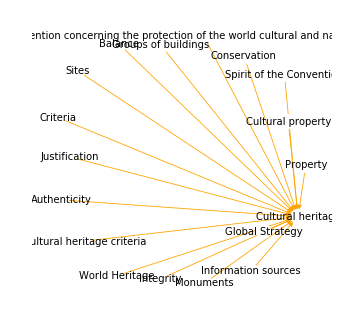

In [77]:
# Make a Single Term Importance Net (STIN), which includes a term X and all those that depend on X in a term dependency network.
single_term = 'Cultural heritage'
stin = nx.DiGraph()
for i in tdn_graph.edges():
    if single_term == i[1]:
        stin.add_edge(i[0], i[1])

# Display STIN as markdown-compatible table
from tabulate import tabulate
stin_rows = []
for i in stin.edges():
    stin_rows.append((i[0], i[1]))
type(stin_rows)
print(tabulate(stin_rows, headers = ['Term', 'Uses'], tablefmt="pipe"))
print(len(stin_rows))

# Draw STIN and save as PNG image
figure(num=None, figsize=(5, 5), dpi=60, facecolor='w', edgecolor='g')
pos = nx.spring_layout(stin, k=20)
nx.draw(stin, pos, arrows=True, with_labels=True, node_color='#FFFFFF', edge_color='#FFA500')
plt.savefig("stin.png")

| Term              | Uses                        |
|:------------------|:----------------------------|
| Cultural heritage | Convention                  |
| Cultural heritage | Cultural heritage           |
| Cultural heritage | Groups of buildings         |
| Cultural heritage | Inscription                 |
| Cultural heritage | Monuments                   |
| Cultural heritage | Outstanding universal value |
| Cultural heritage | Sites                       |
| Cultural heritage | UNESCO                      |
8


/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


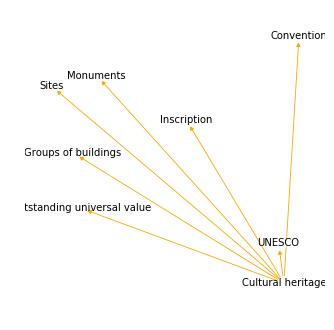

In [78]:
# Make a Single Term Sensitivity Net (STSN), which includes a term X and all those on which X depends in a term dependency network.
single_term = 'Cultural heritage'
stsn = nx.DiGraph()
for i in tdn_graph.edges():
    if single_term == i[0]:
        stsn.add_edge(i[0], i[1])

# Display STSN as markdown-compatible table
from tabulate import tabulate
stsn_rows = []
for i in stsn.edges():
    stsn_rows.append((i[0], i[1]))
type(stsn_rows)
print(tabulate(stsn_rows, headers = ['Term', 'Uses'], tablefmt="pipe"))
print(len(stsn_rows))

# Draw STSN and save as PNG image
figure(num=None, figsize=(5, 5), dpi=60, facecolor='w', edgecolor='g')
pos = nx.random_layout(stsn)
nx.draw(stsn, pos, arrows=True, with_labels=True, node_color='#FFFFFF', edge_color='#FFA500')
plt.savefig("stsn.png")

In [24]:
# Make a Single Term Dependency Net, which includes all edges entering and exiting a single term.
single_term = 'Immovable property'
stdn = nx.DiGraph()
for i in tdn_graph.edges():
    if single_term in i:
        stdn.add_edge(i[0], i[1])

In [25]:
len(stdn.edges())

7

In [26]:
del stdn_edge_colors
del stdn_node_colors

NameError: name 'stdn_edge_colors' is not defined

In [27]:
# Let edges entering single_term and their origin nodes be red. Let edges exiting it, and its terget nodes be orange.
stdn_node_colors = {} # must be of dict type for set_edge_attributes to work
stdn_edge_colors = {} # must be of dict type for set_edge_attributes to work
for i in stdn.edges:
    if i[0] == single_term:
        stdn_node_colors[i] = '#FF0000'
        stdn_edge_colors[i] = '#FF0000'
    else:
        stdn_node_colors[i] = '#000000'
        stdn_edge_colors[i] = '#000000'
# Put node and edge colors as node and edge attributes in the graph
nx.set_edge_attributes(stdn, stdn_node_colors, 'node color')
nx.set_edge_attributes(stdn, stdn_edge_colors, 'edge color')

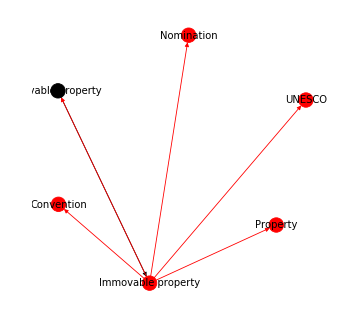

In [28]:
# Draw the single term dependency network, save it as a file.
figure(num=None, figsize=(5, 5), dpi=60, facecolor='w', edgecolor='g')
pos = nx.spring_layout(stdn, k=20)
# pos = nx.circular_layout(stdn)
edges = stdn.edges()
node_colors = [stdn[u][v]['node color'] for u, v in edges]
edge_colors = [stdn[u][v]['edge color'] for u, v in edges]
nx.draw(stdn, pos, arrows=True, with_labels=True, node_color=node_colors, edgelist=edges, edge_color=edge_colors)
plt.savefig("stdn.png")